In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

In [107]:
df1 = pd.read_csv('adyen_file_1.csv')

In [108]:
df2 = pd.read_csv('adyen_file_2.csv')

In [109]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378388 entries, 0 to 378387
Data columns (total 10 columns):
creation_date      378388 non-null object
txid               378388 non-null int64
amount             378388 non-null object
scheme             378388 non-null object
avs                378388 non-null object
cvc                378388 non-null object
issuing_country    378388 non-null object
auth               378388 non-null int64
chargeback         378388 non-null int64
refusal            378388 non-null int64
dtypes: int64(4), object(6)
memory usage: 28.9+ MB


In [110]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189194 entries, 0 to 189193
Data columns (total 3 columns):
txid              189194 non-null int64
funding_source    189194 non-null object
currency_code     189194 non-null object
dtypes: int64(1), object(2)
memory usage: 4.3+ MB


In [111]:
df1.head()

,creation_date,txid,amount,scheme,avs,cvc,issuing_country,auth,chargeback,refusal
0,2019-08-31,-1,62.68,0,Yes,Yes,US,1,0,0
1,2019-08-31,13458888,55.39,0,Yes,Yes,US,1,0,0
2,2019-08-31,31160339,413.30,0,Yes,Yes,US,1,0,0
3,2019-08-31,39297889,712.00,mc,Yes,Yes,SE,1,0,0
4,2019-08-31,38608158,262.87,mc,Yes,Yes,US,1,0,0


In [112]:
df2.head()

,txid,funding_source,currency_code
0,31192331,DEBIT,BRL
1,12512484,DEBIT,BRL
2,26217282,DEBIT,BRL
3,31567208,DEBIT,BRL
4,-1,DEBIT,BRL


In [113]:
df1['amount'] = df1['amount'].apply(lambda x: x.replace(',',''))
df1['amount'] = pd.to_numeric(df1['amount'])

In [114]:
df1.iloc[100]

creation_date      2019-08-31
txid                       -1
amount                 196.58
scheme                      0
avs                       Yes
cvc                       Yes
issuing_country            US
auth                        1
chargeback                  0
refusal                     0
Name: 100, dtype: object

In [115]:
df1 = df1[df1['txid'] != -1]

In [116]:
df2 = df2[df2['txid'] != -1]

In [117]:
df1['scheme'] = df1['scheme'].apply(lambda x: 'visa' if x == '0' else x)

In [118]:
df1.drop_duplicates('txid', inplace=True)

In [119]:
df2.drop_duplicates('txid', inplace=True)

In [120]:
df_merge = pd.merge(df1, df2, how='inner', on='txid')

In [121]:
df_merge.head()

,creation_date,txid,amount,scheme,avs,cvc,issuing_country,auth,chargeback,refusal,funding_source,currency_code
0,2019-08-31,13458888,55.39,visa,Yes,Yes,US,1,0,0,CREDIT,USD
1,2019-08-31,31160339,413.30,visa,Yes,Yes,US,1,0,0,CREDIT,USD
2,2019-08-31,39297889,712.00,mc,Yes,Yes,SE,1,0,0,CREDIT,SEK
3,2019-08-31,38608158,262.87,mc,Yes,Yes,US,1,0,0,CREDIT,USD
4,2019-08-31,34579337,56.90,visa,Yes,Yes,US,1,0,0,CREDIT,USD


In [122]:
# Exercise 2A: Calculate Authorization Rate

# Answer: 83.32%

In [123]:
df_merge['auth'].value_counts()

1    117825
0     23586
Name: auth, dtype: int64

In [124]:
sum(df_merge['auth']) / df_merge['txid'].count()

0.8332095805842544

In [125]:
# ------------------------------------------------------------------------------------------------------------

In [126]:
# Exercise 2B: Authorized tx count by scheme

In [127]:
df_merge['scheme'].value_counts()

visa    87071
mc      54340
Name: scheme, dtype: int64

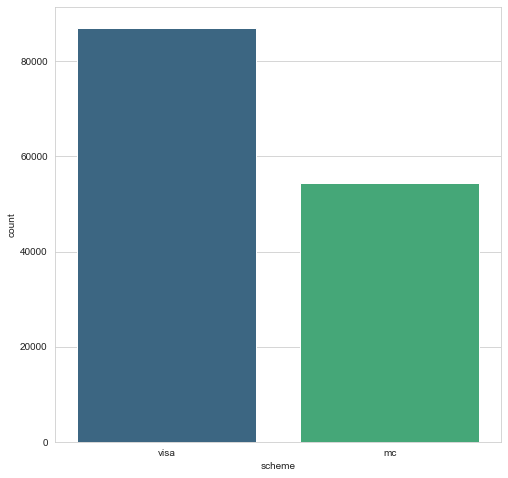

In [128]:
plt.figure(figsize=(8,8))
sns.countplot(x='scheme', data=df_merge, palette='viridis')


In [129]:
# ------------------------------------------------------------------------------------------------------------

In [130]:
# Exercise 2C: Percentage total of credit card transaction by currency

# Solution: 
# Credit Cards: 61.23%
# Debit Cards: 34.20%
# Prepaid Cards: 3.70%
# Deferred Debit Cards: 0.88%

In [131]:
df_merge['funding_source'].value_counts()

CREDIT            86579
DEBIT             48362
PREPAID            5229
DEFFERED_DEBIT     1241
Name: funding_source, dtype: int64

In [132]:
total_txid = df_merge['txid'].count()
print(total_txid)

141411


In [133]:
print(f"Credit Cards: {sum(df_merge['funding_source'] == 'CREDIT') / total_txid*100}")
print(f"Debit Cards: {sum(df_merge['funding_source'] == 'DEBIT') / total_txid*100}")
print(f"Prepaid Cards: {sum(df_merge['funding_source'] == 'PREPAID') / total_txid*100}")
print(f"Deferred Debit Cards: {sum(df_merge['funding_source'] == 'DEFFERED_DEBIT') / total_txid*100}")

Credit Cards: 61.22508150002475
Debit Cards: 34.19960257688581
Prepaid Cards: 3.6977321424783076
Deferred Debit Cards: 0.8775837806111264


In [134]:
# ------------------------------------------------------------------------------------------------------------

In [135]:
# Exercise 2D: Average transaction value by scheme and currency

# Scroll down for solution #

## By scheme and transaction

In [136]:
approved_transactions = df_merge[df_merge['auth'] == 1]

In [137]:
total_visa = df_merge[df_merge['scheme'] == 'visa']
approved_visa = approved_transactions[approved_transactions['scheme'] == 'visa']

In [138]:
df_mc = df_merge[df_merge['scheme'] == 'mc']
approved_mc = approved_transactions[approved_transactions['scheme'] == 'mc']

## By Visa and Currency

In [139]:
visa_curr_avg = total_visa.groupby('currency_code').mean()
visa_curr_avg

,txid,amount,auth,chargeback,refusal
currency_code,,,,,
BRL,2.513382e+07,526.562131,0.703234,0.009973,0.296766
CAD,2.488560e+07,116.687211,0.906270,0.000850,0.093730
CHF,2.589541e+07,178.199137,0.798561,0.000000,0.201439
DKK,2.507895e+07,891.340788,0.679803,0.000000,0.320197
EUR,2.489436e+07,132.661267,0.829543,0.001360,0.170457
GBP,2.505318e+07,125.256602,0.807640,0.000000,0.192360
JPY,2.495042e+07,16615.698598,0.467290,0.000000,0.532710
NOK,2.538285e+07,1173.876935,0.895161,0.000000,0.104839
SEK,2.518710e+07,1230.632819,0.895062,0.000000,0.104938


In [140]:
approved_visa_curr_avg = approved_visa.groupby('currency_code').mean()
approved_visa_curr_avg

,txid,amount,auth,chargeback,refusal
currency_code,,,,,
BRL,2.511572e+07,417.761169,1.0,0.014181,0.0
CAD,2.489428e+07,112.815117,1.0,0.000938,0.0
CHF,2.547567e+07,181.704144,1.0,0.000000,0.0
DKK,2.439100e+07,810.763696,1.0,0.000000,0.0
EUR,2.487232e+07,117.855759,1.0,0.001639,0.0
GBP,2.518038e+07,107.395220,1.0,0.000000,0.0
JPY,2.557372e+07,9988.095000,1.0,0.000000,0.0
NOK,2.519468e+07,1108.980991,1.0,0.000000,0.0
SEK,2.517217e+07,1213.290920,1.0,0.000000,0.0


In [141]:
# Note: Japan is an outlier in terms of amounts

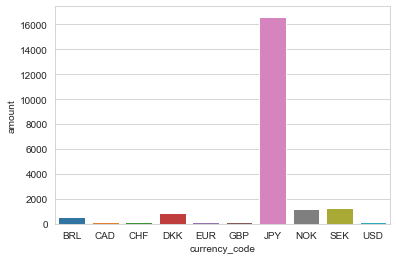

In [142]:
sns.barplot(x='currency_code', y='amount', data=visa_curr_avg.reset_index())

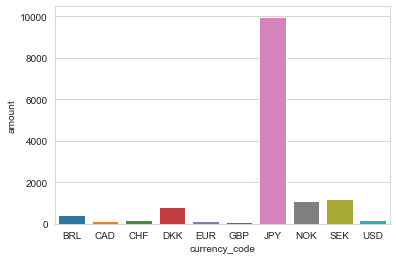

In [143]:
sns.barplot(x='currency_code', y='amount', data=approved_visa_curr_avg.reset_index())

In [144]:
# Difference between Approved Avg Amounts - Total Avg Amount
# Japan is an outlier. Could be due to JPY being in larger denominations. 

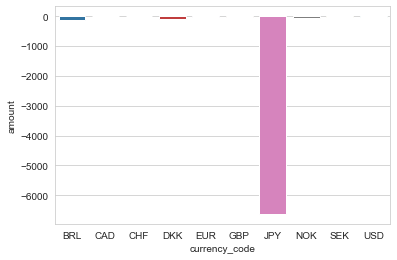

In [145]:
sns.barplot(x='currency_code', y='amount', data=(approved_visa_curr_avg['amount'] - visa_curr_avg['amount']).reset_index())

In [146]:
# Removed Japan temporarily to see impact across other currencies
# For the most part, if unauthorized transactions are removed, you get a smaller

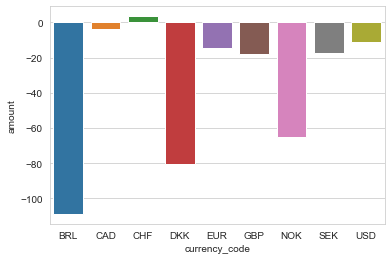

In [147]:
sns.barplot(x='currency_code', y='amount', data=(approved_visa_curr_avg['amount'] - visa_curr_avg['amount']).drop('JPY').reset_index())

## By MC and currency

In [148]:
mc_curr_avg = df_mc.groupby('currency_code').mean()
mc_curr_avg

,txid,amount,auth,chargeback,refusal
currency_code,,,,,
BRL,2.515407e+07,451.902305,0.780619,0.013580,0.219381
CAD,2.515042e+07,114.503847,0.914179,0.000373,0.085821
CHF,2.448363e+07,150.643252,0.860140,0.000000,0.139860
DKK,2.481534e+07,1102.039291,0.813765,0.000000,0.186235
EUR,2.508599e+07,132.433334,0.822702,0.000000,0.177298
GBP,2.501325e+07,165.316644,0.867403,0.000000,0.132597
JPY,2.605568e+07,14345.901369,0.452381,0.000000,0.547619
NOK,2.359067e+07,1689.230598,0.897436,0.000000,0.102564
SEK,2.467423e+07,1231.215878,0.886929,0.000000,0.113071


In [149]:
approved_mc_curr_avg = approved_mc.groupby('currency_code').mean()
approved_mc_curr_avg

,txid,amount,auth,chargeback,refusal
currency_code,,,,,
BRL,2.512684e+07,376.690060,1.0,0.017397,0.0
CAD,2.505026e+07,112.308420,1.0,0.000408,0.0
CHF,2.447492e+07,155.599268,1.0,0.000000,0.0
DKK,2.479725e+07,1137.012736,1.0,0.000000,0.0
EUR,2.511153e+07,119.887586,1.0,0.000000,0.0
GBP,2.502472e+07,134.265143,1.0,0.000000,0.0
JPY,2.520442e+07,9944.729342,1.0,0.000000,0.0
NOK,2.310040e+07,1479.237905,1.0,0.000000,0.0
SEK,2.456464e+07,1207.170217,1.0,0.000000,0.0


In [150]:
# Difference between Approved Avg Amounts - Total Avg Amount
# Japan is an outlier. Could be due to JPY being in larger denominations. 

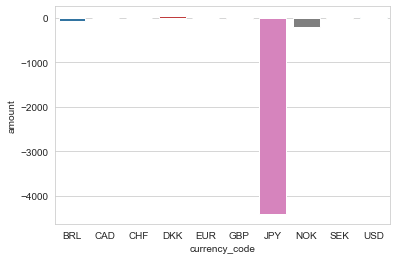

In [151]:
sns.barplot(x='currency_code', y='amount', data=(approved_mc_curr_avg['amount'] - mc_curr_avg['amount']).reset_index())

In [152]:
# Removed Japan temporarily to see impact across other currencies
# Approved CAD, CHF, DKK, USD average transactions are larger if unauthorized transactions are removed

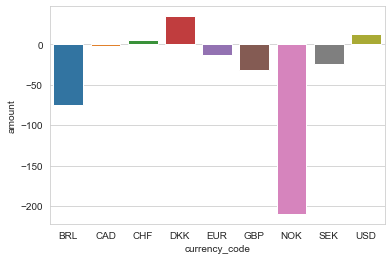

In [153]:
sns.barplot(x='currency_code', y='amount', data=(approved_mc_curr_avg['amount'] - mc_curr_avg['amount']).drop('JPY').reset_index())

### Average transaction value by currency only 

In [154]:
df_by_currency = df_merge.groupby('currency_code').mean()
df_by_currency

,txid,amount,auth,chargeback,refusal
currency_code,,,,,
BRL,2.514685e+07,478.542664,0.753006,0.012293,0.246994
CAD,2.498170e+07,115.894873,0.909140,0.000677,0.090860
CHF,2.494537e+07,159.655647,0.840000,0.000000,0.160000
DKK,2.489211e+07,1040.673730,0.774749,0.000000,0.225251
EUR,2.498446e+07,132.554092,0.826326,0.000720,0.173674
GBP,2.504338e+07,135.091621,0.822313,0.000000,0.177687
JPY,2.526197e+07,15975.889983,0.463087,0.000000,0.536913
NOK,2.480837e+07,1339.072493,0.895890,0.000000,0.104110
SEK,2.481806e+07,1231.052366,0.889209,0.000000,0.110791


In [155]:
approved_df_by_currency = approved_transactions.groupby('currency_code').mean()
approved_df_by_currency

,txid,amount,auth,chargeback,refusal
currency_code,,,,,
BRL,2.512313e+07,390.376509,1.0,0.016325,0.0
CAD,2.495120e+07,112.630219,1.0,0.000745,0.0
CHF,2.478608e+07,163.715910,1.0,0.000000,0.0
DKK,2.469343e+07,1053.637981,1.0,0.000000,0.0
EUR,2.498431e+07,118.806940,1.0,0.000872,0.0
GBP,2.514007e+07,114.353699,1.0,0.000000,0.0
JPY,2.547203e+07,9976.153732,1.0,0.000000,0.0
NOK,2.452221e+07,1227.870826,1.0,0.000000,0.0
SEK,2.473614e+07,1208.897995,1.0,0.000000,0.0


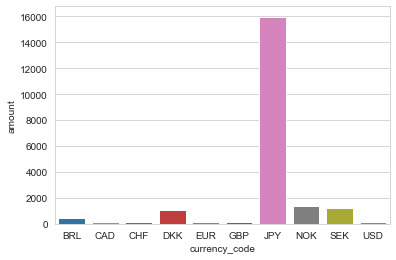

In [156]:
    sns.barplot(x='currency_code', y='amount', data=df_by_currency.reset_index())

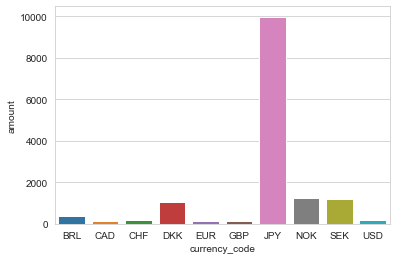

In [157]:
sns.barplot(x='currency_code', y='amount', data=approved_df_by_currency.reset_index())

In [158]:
# Difference between Approved Avg Amounts - Total Avg Amount
# Japan is an outlier. Could be due to JPY being in larger denominations. 

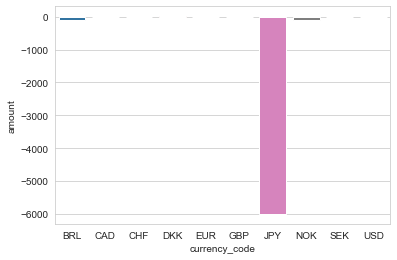

In [159]:
sns.barplot(x='currency_code', y='amount', data=(approved_df_by_currency['amount'] - df_by_currency['amount']).reset_index())

In [160]:
# Removed Japan temporarily to see impact across other currencies
# Looking at it from purely a currency standpoint, average transactions are lower if unauthorized transactions are removed
# The exception being in CHF, DKK

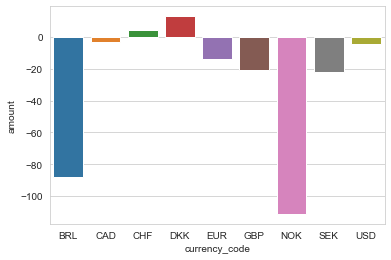

In [161]:
sns.barplot(x='currency_code', y='amount', data=(approved_df_by_currency['amount'] - df_by_currency['amount']).drop('JPY').reset_index())

## Average transaction value by scheme only 

In [162]:
df_by_scheme = df_merge.groupby('scheme').mean()
df_by_scheme

,txid,amount,auth,chargeback,refusal
scheme,,,,,
mc,2.502738e+07,299.014654,0.755907,0.003662,0.244093
visa,2.500183e+07,282.829367,0.881453,0.001734,0.118547


In [163]:
approved_df_by_scheme = approved_transactions.groupby('scheme').mean()
approved_df_by_scheme

,txid,amount,auth,chargeback,refusal
scheme,,,,,
mc,2.500564e+07,266.218873,1.0,0.004845,0.0
visa,2.498348e+07,204.724840,1.0,0.001967,0.0


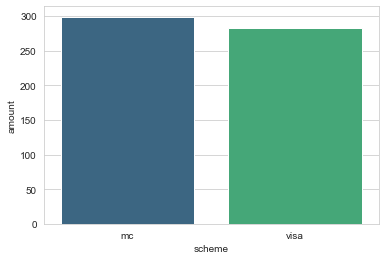

In [164]:
sns.barplot(x='scheme', y='amount', data=df_by_scheme.reset_index(), palette='viridis')

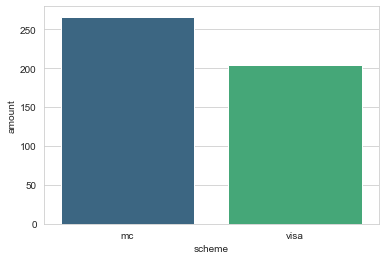

In [165]:
sns.barplot(x='scheme', y='amount', data=approved_df_by_scheme.reset_index(),palette='viridis')

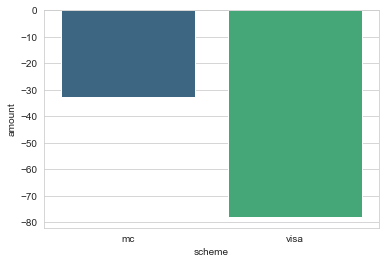

In [166]:
sns.barplot(x='scheme', y='amount', data=(approved_df_by_scheme['amount'] - df_by_scheme['amount']).reset_index(), palette='viridis')

# Solution for 2D

# Based on Authorized and Unauthorized transactions

In [167]:
pd.DataFrame(visa_curr_avg['amount'], visa_curr_avg.reset_index()['currency_code'])


,amount
currency_code,
BRL,526.562131
CAD,116.687211
CHF,178.199137
DKK,891.340788
EUR,132.661267
GBP,125.256602
JPY,16615.698598
NOK,1173.876935
SEK,1230.632819


In [168]:
pd.DataFrame(mc_curr_avg['amount'], visa_curr_avg.reset_index()['currency_code'])


,amount
currency_code,
BRL,451.902305
CAD,114.503847
CHF,150.643252
DKK,1102.039291
EUR,132.433334
GBP,165.316644
JPY,14345.901369
NOK,1689.230598
SEK,1231.215878


In [169]:
pd.DataFrame(df_by_currency['amount'], df_by_currency.reset_index()['currency_code'])


,amount
currency_code,
BRL,478.542664
CAD,115.894873
CHF,159.655647
DKK,1040.673730
EUR,132.554092
GBP,135.091621
JPY,15975.889983
NOK,1339.072493
SEK,1231.052366


In [170]:
pd.DataFrame(df_by_scheme['amount'], df_by_scheme.reset_index()['scheme'])


,amount
scheme,
mc,299.014654
visa,282.829367


# Based on Authorized Transactions only

In [171]:
pd.DataFrame(approved_visa_curr_avg['amount'], approved_visa_curr_avg.reset_index()['currency_code'])


,amount
currency_code,
BRL,417.761169
CAD,112.815117
CHF,181.704144
DKK,810.763696
EUR,117.855759
GBP,107.395220
JPY,9988.095000
NOK,1108.980991
SEK,1213.290920


In [172]:
pd.DataFrame(approved_mc_curr_avg['amount'], approved_mc_curr_avg.reset_index()['currency_code'])


,amount
currency_code,
BRL,376.690060
CAD,112.308420
CHF,155.599268
DKK,1137.012736
EUR,119.887586
GBP,134.265143
JPY,9944.729342
NOK,1479.237905
SEK,1207.170217


In [173]:
pd.DataFrame(approved_df_by_currency['amount'], approved_df_by_currency.reset_index()['currency_code'])


,amount
currency_code,
BRL,390.376509
CAD,112.630219
CHF,163.715910
DKK,1053.637981
EUR,118.806940
GBP,114.353699
JPY,9976.153732
NOK,1227.870826
SEK,1208.897995


In [174]:
pd.DataFrame(approved_df_by_scheme['amount'], approved_df_by_scheme.reset_index()['scheme'])


,amount
scheme,
mc,266.218873
visa,204.724840


# Exercise 3: Improve authorization rate

In [175]:
df_auth_rate =  pd.DataFrame(data=df_merge.groupby('currency_code').sum()['auth'], index=df_merge.groupby('currency_code').count()['auth'].reset_index()['currency_code'] )
df_auth_rate['txid'] = df_merge.groupby('currency_code').count()['txid']
df_auth_rate['unauth'] = df_auth_rate['txid'] - df_auth_rate['auth']


In [176]:
def total_authorized(cols):
    auth = cols[0]
    txid = cols[1]
    return auth/txid

In [177]:
df_auth_rate['Pct Auth'] = (df_auth_rate[['auth', 'txid']].apply(total_authorized, axis=1))*100
df_auth_rate['Pct Unauth'] = 100-(df_auth_rate['Pct Auth'])
df_auth_rate['Pct Auth Pop'] = df_auth_rate['auth']/sum(df_merge['auth'] == 1)*100
df_auth_rate['Pct UnAuth Pop'] = df_auth_rate['unauth']/sum(df_merge['auth'] == 0)*100
df_auth_rate['Population Auth'] = sum(df_merge['auth'] == 1)
df_auth_rate['Population UnAuth'] = sum(df_merge['auth'] == 0)

In [178]:
df_auth_rate

,auth,txid,unauth,Pct Auth,Pct Unauth,Pct Auth Pop,Pct UnAuth Pop,Population Auth,Population UnAuth
currency_code,,,,,,,,,
BRL,13966,18547,4581,75.300588,24.699412,11.853172,19.422539,117825,23586
CAD,6714,7385,671,90.914015,9.085985,5.698281,2.844908,117825,23586
CHF,357,425,68,84.000000,16.000000,0.302992,0.288307,117825,23586
DKK,540,697,157,77.474892,22.525108,0.458307,0.665649,117825,23586
EUR,12618,15270,2652,82.632613,17.367387,10.709102,11.243958,117825,23586
GBP,2425,2949,524,82.231265,17.768735,2.058137,2.221657,117825,23586
JPY,276,596,320,46.308725,53.691275,0.234246,1.356737,117825,23586
NOK,327,365,38,89.589041,10.410959,0.277530,0.161113,117825,23586
SEK,1541,1733,192,88.920946,11.079054,1.307872,0.814042,117825,23586


In [179]:
# Authorized Sums vs Unauthorized Sums

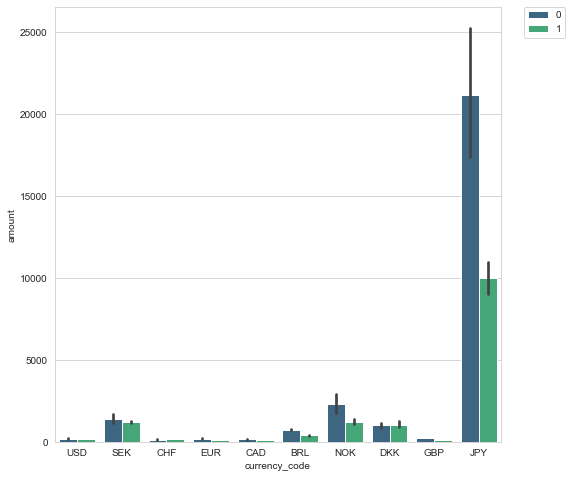

In [180]:
plt.figure(figsize=(8,8))
sns.barplot(x='currency_code', y='amount', data=df_merge, hue='auth', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [181]:
# Removing Japan to scale down

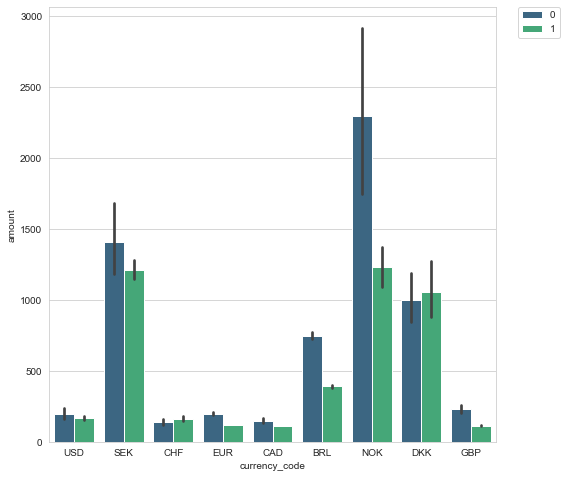

In [182]:
plt.figure(figsize=(8,8))
sns.barplot(x='currency_code', y='amount', data=df_merge[df_merge['currency_code']!='JPY'], hue='auth', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
